# Predicting heart disease using machine learning


## 1. Problem Definition
Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data
The original data came from the Cleavland database from the UCI Machine Learning Repository.

https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset 

## 3. Evaluation
> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll likely pursue this project.

## 4. Features
**Data Dictionary**

* age: Displays the age of the individual.
* sex: Displays the gender of the individual using the following format : 1 = male 0 = female

* cp- Chest-pain type: displays the type of chest-pain experienced by the individual using the following format : 0 = typical angina 1 = atypical angina 2 = non — anginal pain 3 = asymptotic

* trestbps- Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit). anything above 130-140 is typically cause for concern.

* chol- Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)

* fbs- Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl. If fasting blood sugar > 120mg/dl then : 1 (true) else : 0 (false) '>126' mg/dL signals diabetes

* restecg- Resting ECG : displays resting electrocardiographic results 0 = normal 1 = having ST-T wave abnormality 2 = left ventricular hyperthrophy

* thalach- Max heart rate achieved : displays the max heart rate achieved by an individual.

* exang- Exercise induced angina : 1 = yes 0 = no

* oldpeak- ST depression induced by exercise relative to rest: displays the value which is an integer or float.

* slope- Slope of the peak exercise ST segment : 0 = upsloping: better heart rate with excercise (uncommon) 1 = flat: minimal change (typical healthy heart) 2 = downsloping: signs of unhealthy heart

* ca- Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.

* thal : Displays the thalassemia : 1,3 = normal 6 = fixed defect 7 = reversible defect: no proper blood movement when excercising

* target : Displays whether the individual is suffering from heart disease or not : 1 = yes 0 = no

# Data Analysis




In [1]:
# Importing all the tools we need

# EDA (Exploratory Data Analysis)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#  Models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay # new in Scikit-Learn 1.2+



## Load Data

In [2]:
df = pd.read_csv("./data/heart-disease.csv") 
df.shape 

(303, 15)

In [3]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,female,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3,no
299,45,male,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3,no
300,68,male,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3,no
301,57,male,0,NaN,131.0,0,1,115.0,1,1.2,1,1,3,no


## EDA 


In [4]:
df.target.value_counts()

target
yes    165
no     138
Name: count, dtype: int64

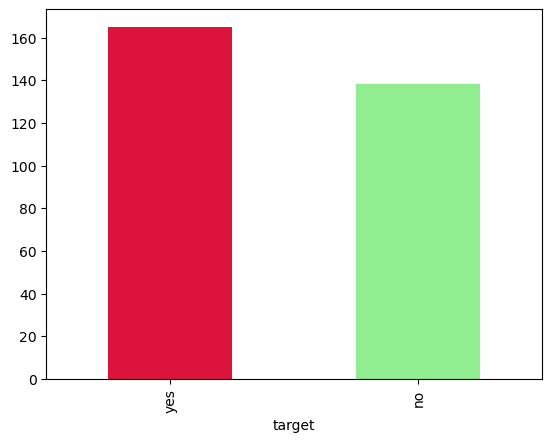

In [5]:
df['target'].value_counts().plot(kind='bar', color=['crimson', 'lightgreen']);


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    int64  
 3   trestbps  299 non-null    float64
 4   chol      302 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   298 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    object 
dtypes: float64(4), int64(8), object(2)
memory usage: 33.3+ KB


In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    4
chol        1
fbs         0
restecg     0
thalach     5
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
# 1. For trestbps (Resting Blood Pressure) - use median
df['trestbps'].fillna(df['trestbps'].median(), inplace=True)

# 2. For chol (Cholesterol) - use median
df['chol'].fillna(df['chol'].median(), inplace=True)

# 3. For thalach (Max Heart Rate) - use median
df['thalach'].fillna(df['thalach'].median(), inplace=True)
 
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.966997,131.689769,246.298680,0.148515,0.528053,149.909241,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,1.032052,17.512988,51.823351,0.356198,0.525860,22.378647,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,136.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


### Heart Disease Frequency according to Sex


In [10]:
df.sex.value_counts()

sex
male      207
female     96
Name: count, dtype: int64

In [11]:
# Compare target column with sex column
sex_target_crosstab = pd.crosstab(df.target, df.sex)

# Calculate percentage for each column
for col in sex_target_crosstab.columns:
    sex_target_crosstab[f'{col}_percentage'] = sex_target_crosstab[col] / sex_target_crosstab[col].sum() * 100

sex_target_crosstab

sex,female,male,female_percentage,male_percentage
target,,,,
no,24,114,25.0,55.072464
yes,72,93,75.0,44.927536


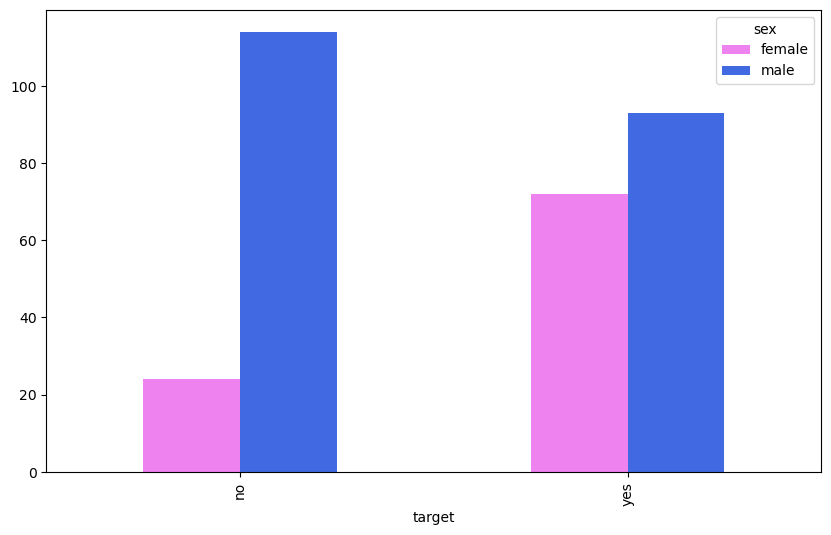

In [12]:
# Create a plot
pd.crosstab(df.target, df.sex).plot(kind="bar", 
                                    figsize=(10,6), 
                                    color=["violet", "royalblue"]);

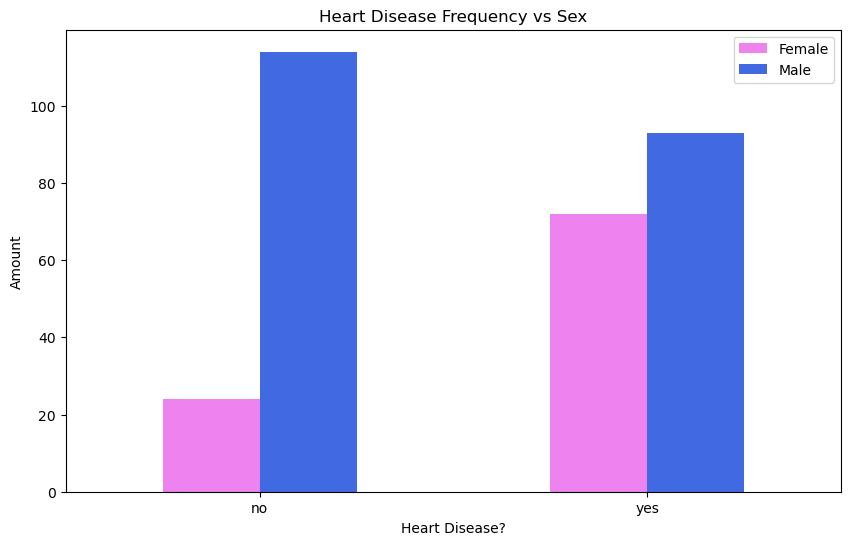

In [13]:
# Create a plot
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6), color=["violet", "royalblue"])

# Add some attributes to it
plt.title("Heart Disease Frequency vs Sex")
plt.xlabel("Heart Disease?")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0); # keep the labels on the x-axis vertical

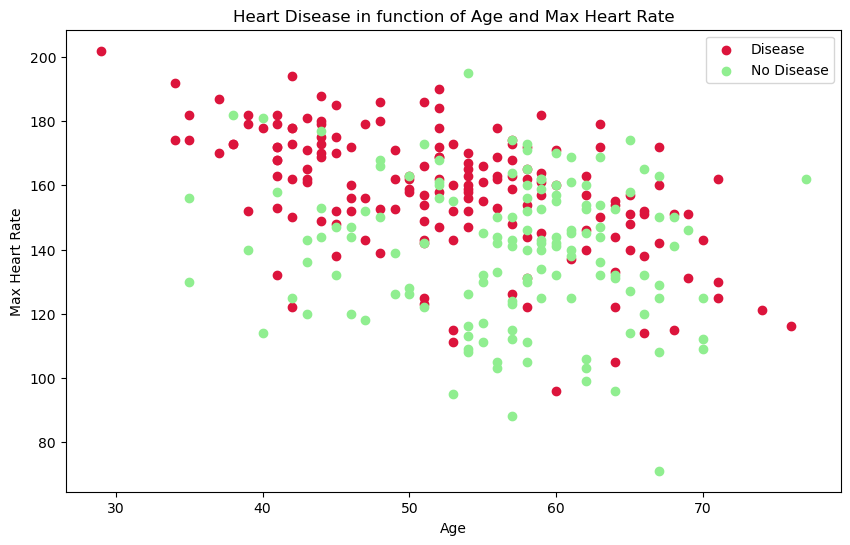

In [14]:
# Scatter with positive and negative examples
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target=='yes'], 
            df.thalach[df.target=='yes'], 
            c="crimson")  

plt.scatter(df.age[df.target=='no'], 
            df.thalach[df.target=='no'], 
            c="lightgreen") 
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

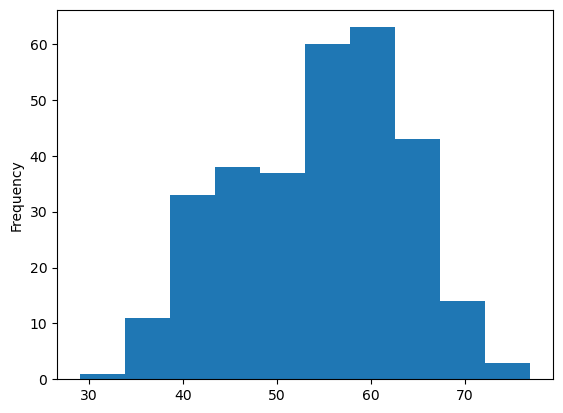

In [15]:
df.age.plot.hist();

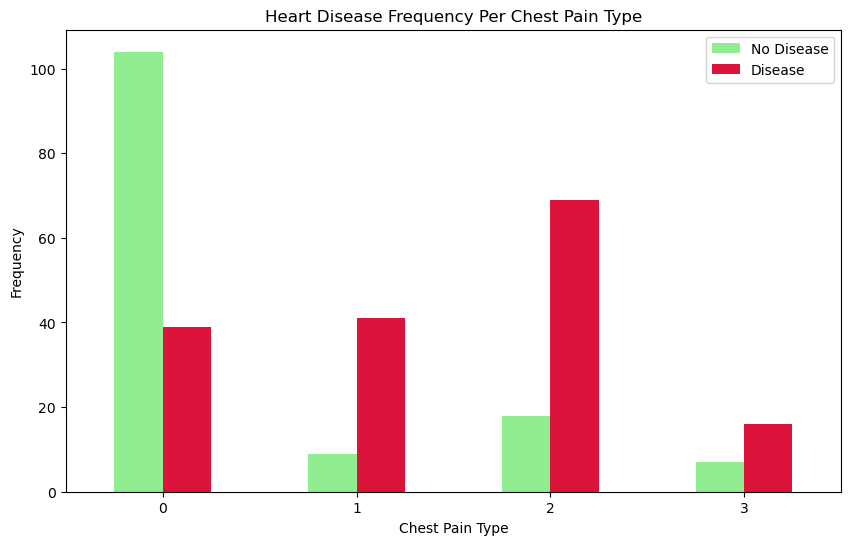

In [16]:
# Create a new crosstab and base plot
pd.crosstab(df.cp, df.target).plot(kind="bar", 
                                   figsize=(10,6), 
                                   color=["lightgreen", "crimson"])

# Add attributes to the plot to make it more readable
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

In [17]:
df.target.value_counts()

target
yes    165
no     138
Name: count, dtype: int64

In [18]:
def string_to_float(col):
    if str(col).lower() == "yes" or str(col).lower() == 'male':
        return 1
    else:
        return 0

# Let's check what unique values exist in target column first
print("Unique values in target before conversion:", df["target"].unique())

# Apply the conversion
df["target"] = df["target"].apply(string_to_float)
df['sex'] = df['sex'].apply(string_to_float)

# Verify the conversion worked
print("Unique values in target after conversion:", df["target"].unique())

# Now try the correlation matrix
df.corr()

Unique values in target before conversion: ['yes' 'no']
Unique values in target after conversion: [1 0]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279391,0.213534,0.121308,-0.116211,-0.393889,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.062394,-0.197484,0.045032,-0.058196,-0.051346,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047797,-0.077544,0.094444,0.044421,0.299584,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279391,-0.062394,0.047797,1.000000,0.125550,0.176209,-0.110873,-0.028536,0.069108,0.193691,-0.121031,0.098837,0.060363,-0.141687
chol,0.213534,-0.197484,-0.077544,0.125550,1.000000,0.013016,-0.150460,-0.022395,0.066566,0.053359,-0.003384,0.070699,0.098474,-0.085984
fbs,0.121308,0.045032,0.094444,0.176209,0.013016,1.000000,-0.084189,0.002943,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.110873,-0.150460,-0.084189,1.000000,0.038133,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.393889,-0.051346,0.299584,-0.028536,-0.022395,0.002943,0.038133,1.000000,-0.395906,-0.346365,0.379017,-0.206977,-0.106423,0.409034
exang,0.096801,0.141664,-0.394280,0.069108,0.066566,0.025665,-0.070733,-0.395906,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193691,0.053359,0.005747,-0.058770,-0.346365,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


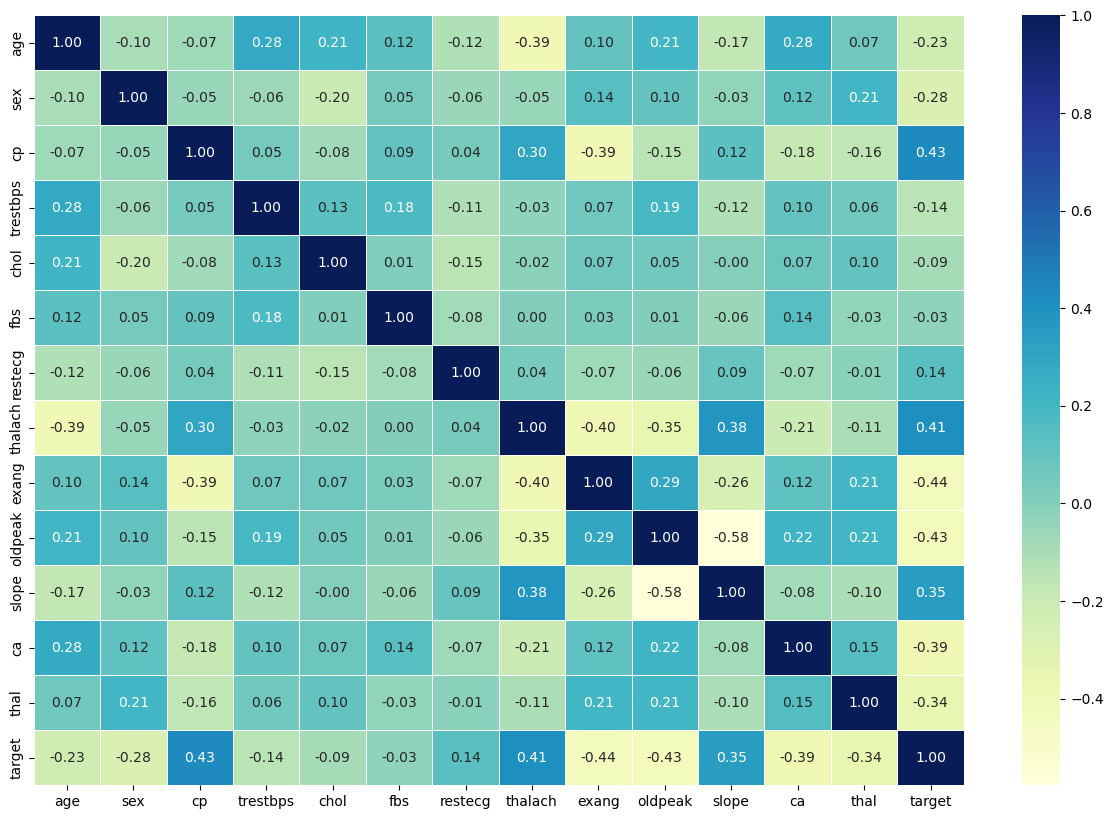

In [19]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix, 
                 annot=True, 
                 linewidths=0.5, 
                 fmt=".2f", 
                 cmap="YlGnBu");


In [87]:
import plotly.graph_objects as go
import plotly.express as px

# Get correlations with target column and sort by absolute values
target_correlations = df.corr()['target'].drop('target')
target_correlations = target_correlations.reindex(target_correlations.abs().sort_values(ascending=True).index)
# Create a color scale
colors = px.colors.diverging.RdBu
color_scale = [[0, colors[0]], [0.5, colors[5]], [1, colors[-1]]]

# Create the figure
fig = go.Figure()

fig.add_trace(go.Bar(
    y=target_correlations.index,
    x=target_correlations.values,
    orientation='h',
    marker=dict(
        color=target_correlations.values,
        colorscale=color_scale,
        colorbar=dict(title=""),
        cmin=-1,
        cmax=1,
    ),
    text=target_correlations.values.round(2),
    textposition='outside',
    hovertemplate='%{y}: %{x:.2f}<extra></extra>'
))

# Update layout
fig.update_layout(
    title='Correlation with Target Variable',
    xaxis_title='Correlation',
    yaxis_title='Features',
    height=600,
    width=800,
)

# Show the plot
fig.show()

# Modeling 

In [21]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [22]:
X = df.drop("target", axis=1)
y = df["target"]

# Split the data into training and test sets
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Trying different models 

In [23]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=100),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier()
}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test,y_test)

    return model_scores
    

In [24]:
model_scores = fit_and_score(models=models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
model_scores

/home/luiz/Downloads/1_datascience/1_intro_ml_ds/bulldozer_regression/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



{'Logistic Regression': 0.8688524590163934,
 'KNN': 0.6557377049180327,
 'Random Forest': 0.8524590163934426}

### Model Comparison

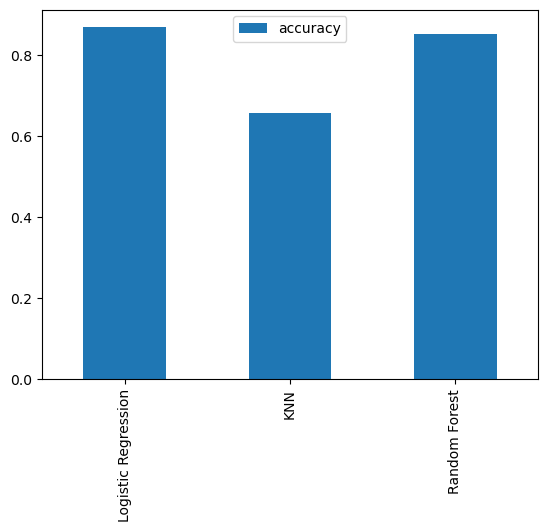

In [25]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();



### Hyperparameter tuning (by hand)

In [26]:
train_scores = []
test_scores = []

neighbors = range(1, 21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

train_scores

[1.0,
 0.8057851239669421,
 0.78099173553719,
 0.756198347107438,
 0.7603305785123967,
 0.756198347107438,
 0.7520661157024794,
 0.7355371900826446,
 0.71900826446281,
 0.6983471074380165,
 0.731404958677686,
 0.6983471074380165,
 0.6942148760330579,
 0.6983471074380165,
 0.6818181818181818,
 0.6776859504132231,
 0.6776859504132231,
 0.6652892561983471,
 0.6735537190082644,
 0.6694214876033058]

In [27]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.639344262295082,
 0.6557377049180327,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.6721311475409836,
 0.6885245901639344,
 0.6721311475409836,
 0.7213114754098361,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7049180327868853,
 0.7049180327868853,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.639344262295082]

Maximum KNN score on the test data: 73.77%, using 13 neighbors


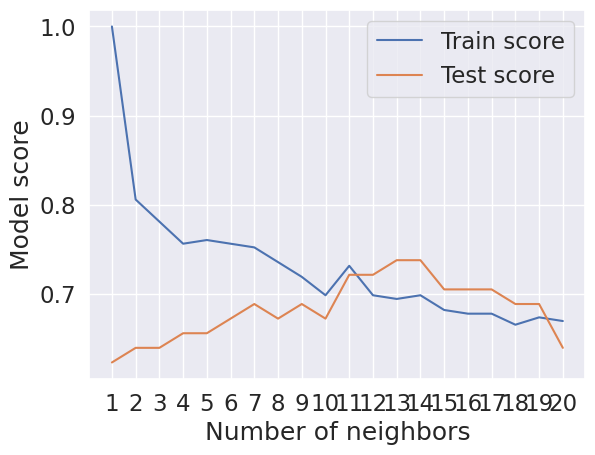

In [57]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%, using {test_scores.index(max(test_scores))+1} neighbors")


In [29]:
# Hyperparameter tuning with RandomizedSearchCV
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {'C': np.logspace(-4,4,20),
                'solver': ['liblinear']}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {
    'n_estimators': np.arange(10,1000,50),
    'max_depth': [None, 3,5,10],
    'min_samples_split': np.arange(2,20,2),
    'min_samples_leaf': np.arange(1,20,2)
}



In [30]:
# Tune LogisticRegression 
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(
    LogisticRegression(),
    param_distributions=log_reg_grid,
    cv=5,
    n_iter=20,
    verbose=2
)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)



Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ..........C=9.999999999999999e-05, solver=liblinear; total time=   0.0s
[CV] END ..........C=9.999999999999999e-05, solver=liblinear; total time=   0.0s
[CV] END ..........C=9.999999999999999e-05, solver=liblinear; total time=   0.0s
[CV] END ..........C=9.999999999999999e-05, solver=liblinear; total time=   0.0s
[CV] END ..........C=9.999999999999999e-05, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0002636650898730358, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0002636650898730358, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0002636650898730358, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0002636650898730358, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0002636650898730358, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775606, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775606, sol

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=2)

In [31]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 78.47599703514607}

In [32]:
rs_log_reg.score(X_test, y_test)

0.8360655737704918

In [33]:
# Setup RandomizedSearchCV for RandomForestClassifier

# Tune RandomForestClassifier 
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(
    RandomForestClassifier(),
    param_distributions=rf_grid,
    cv=5,
    n_iter=20,
    verbose=2
)

# Fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   0.3s
[CV] END max_de

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=2)

In [34]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [35]:
rs_rf.score(X_test, y_test)

0.8688524590163934

In [36]:
model_scores

{'Logistic Regression': 0.8688524590163934,
 'KNN': 0.6557377049180327,
 'Random Forest': 0.8524590163934426}

In [37]:
# Grid Search CV

# Different hyperparameters for LogisticRegression model 
new_log_reg_grid = {
    'C': np.logspace(-4,4,30),
    'solver': ['liblinear']
}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(
    LogisticRegression(),
    param_grid=log_reg_grid,
    cv=5,
    verbose=2
)

gs_log_reg.fit(X_train, y_train);


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ..........C=9.999999999999999e-05, solver=liblinear; total time=   0.0s
[CV] END ..........C=9.999999999999999e-05, solver=liblinear; total time=   0.0s
[CV] END ..........C=9.999999999999999e-05, solver=liblinear; total time=   0.0s
[CV] END ..........C=9.999999999999999e-05, solver=liblinear; total time=   0.0s
[CV] END ..........C=9.999999999999999e-05, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0002636650898730358, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0002636650898730358, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0002636650898730358, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0002636650898730358, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0002636650898730358, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775606, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775606, sol

In [38]:
gs_log_reg.best_params_

{'C': 78.47599703514607, 'solver': 'liblinear'}

In [39]:
gs_log_reg.score(X_test, y_test)

0.8360655737704918

In [40]:
model_scores

{'Logistic Regression': 0.8688524590163934,
 'KNN': 0.6557377049180327,
 'Random Forest': 0.8524590163934426}

# Evaluating the model 
* ROC curve and AUC score (true positive rate and false positive rate) 
* Confusion matrix
* Classification report
* Precision
* Recall
* F1 score
* Area under curve (AUC)

Always use cross-validation when possible.





In [41]:
y_preds = gs_log_reg.predict(X_test)

y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [42]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

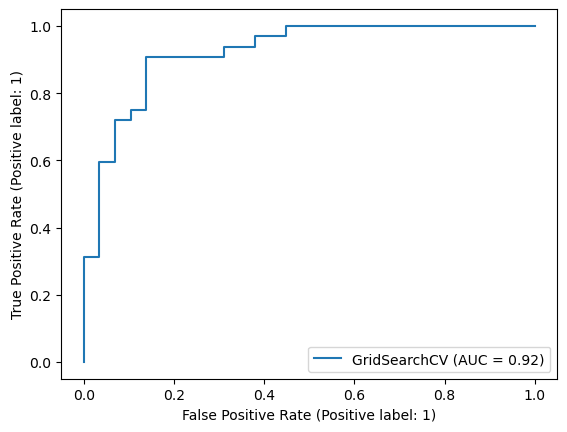

In [43]:
# from_estimator() = use a model to plot ROC curve on data
RocCurveDisplay.from_estimator(estimator=gs_log_reg, 
                               X=X_test, 
                               y=y_test);

In [44]:
#  Confusiom matrix
print(confusion_matrix(y_test, y_preds))


[[25  4]
 [ 6 26]]


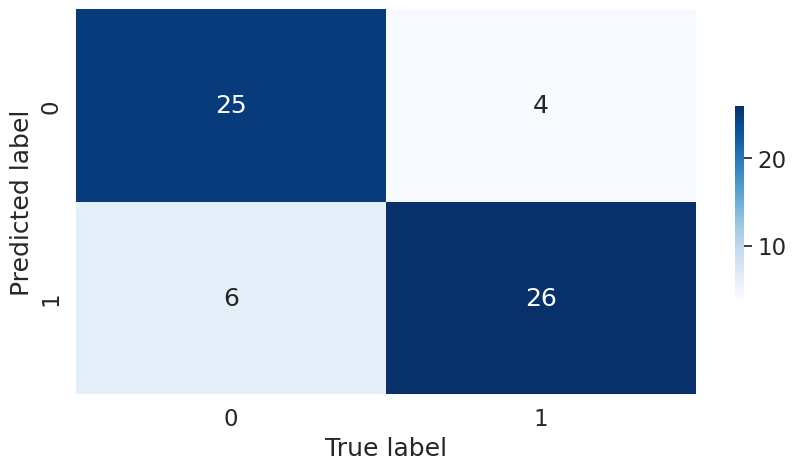

In [45]:
sns.set_theme(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plot a nice looking conf matrix using seaborn's heatmap with intuitive colors
    """
    fig, ax = plt.subplots(figsize=(10,5))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cmap='Blues',  # Using a blue color scheme to indicate true positives
                     cbar_kws={'shrink': 0.5})
    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    
plot_conf_mat(y_test, y_preds)



In [46]:
# Using only 1 split of the data 
print(classification_report(y_test, y_preds))


              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



## Calculate evaluation metrics using cross-validation


In [47]:
gs_log_reg.best_params_

{'C': 78.47599703514607, 'solver': 'liblinear'}

In [48]:
clf = LogisticRegression(
    C=0.23357214690901212,
    solver='liblinear'
)



In [49]:
from sklearn.model_selection import cross_validate

# Define the scoring metrics you want to evaluate
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Perform cross-validation with multiple metrics
cv_results = cross_validate(clf, X, y, cv=5, scoring=scoring)

# Print the results
for metric in scoring:
    mean_score = cv_results[f'test_{metric}'].mean()
    std_score = cv_results[f'test_{metric}'].std()
    print(f"{metric.capitalize()}: {mean_score:.3f} (+/- {std_score:.3f})")

Accuracy: 0.841 (+/- 0.051)
Precision: 0.816 (+/- 0.056)
Recall: 0.921 (+/- 0.024)
F1: 0.865 (+/- 0.039)
Roc_auc: 0.900 (+/- 0.036)


In [50]:
cv_means = pd.DataFrame({metric: cv_results[f'test_{metric}'].mean() for metric in scoring}, index=['mean'])

# Transpose the DataFrame for easier plotting
cv_means_t = cv_means.T.reset_index()
cv_means_t.columns = ['Metric', 'Score']

# Create the plot using Plotly
fig = px.bar(cv_means_t, x='Metric', y='Score', 
             title='Mean Cross-Validation Scores',
             labels={'Score': 'Mean Score'},
             text='Score')

# Customize the layout
fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_yaxes(range=[0, 1])  # Set y-axis range from 0 to 1

# Show the plot
fig.show()

# Print the DataFrame
print(cv_means)

      accuracy  precision    recall        f1   roc_auc
mean  0.841421   0.815873  0.921212  0.864658  0.900184


# Feature Importance
Which features contributed to the outcomes of the model and how did they contribute?


In [51]:
clf

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [52]:
clf.fit(X_train, y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [70]:
clf.coef_

array([[ 0.00275509, -0.88031817,  0.67731704, -0.01075086, -0.00142533,
         0.0362445 ,  0.33782791,  0.02325832, -0.62552117, -0.57762375,
         0.49794323, -0.66389989, -0.69204058]])

Calculation:
The coefficients are calculated through an optimization process, typically using maximum likelihood estimation. The algorithm tries to find the best values for these coefficients that maximize the probability of observing the given data.
Interpretation:

Each coefficient represents the change in the log-odds of the target variable for a one-unit increase in the corresponding feature, holding other features constant.
In simpler terms, it indicates how much the feature influences the prediction of the target variable.


How it affects the target:

A positive coefficient means that increasing the feature value increases the probability of the positive class (usually class 1).
A negative coefficient means that increasing the feature value decreases the probability of the positive class.
The magnitude of the coefficient indicates the strength of the feature's influence.


Odds and probability:

The coefficients are in log-odds scale. To get odds, you need to exponentiate them.
exp(coefficient) gives you the odds ratio for a one-unit increase in the feature.


Standardization:

If features are on different scales, it's often helpful to standardize them before fitting the model. This makes the coefficients more comparable across features.

In [54]:
feat_dict = dict(zip(df.columns, list(clf.coef_[0])))
feat_dict

{'age': 0.0027550876726566706,
 'sex': -0.8803181674520899,
 'cp': 0.6773170384144406,
 'trestbps': -0.0107508641229829,
 'chol': -0.0014253283053941592,
 'fbs': 0.03624449921099951,
 'restecg': 0.33782791412759106,
 'thalach': 0.02325832406206376,
 'exang': -0.6255211747990984,
 'oldpeak': -0.5776237493522239,
 'slope': 0.49794323134170054,
 'ca': -0.6638998857260917,
 'thal': -0.6920405824825704}

In [83]:
# Get feature importance values and create a Series
feature_importance = pd.Series(clf.coef_[0], index=X.columns)
feature_importance = feature_importance.reindex(feature_importance.abs().sort_values(ascending=True).index)



# Create the figure
fig = go.Figure()

# Create color scale
colors = px.colors.diverging.RdBu
color_scale = [[0, colors[0]], [0.5, colors[5]], [1, colors[-1]]]

fig.add_trace(go.Bar(
    y=feature_importance.index,
    x=feature_importance.values,
    orientation='h',
    marker=dict(
        color=feature_importance.values,
        colorscale=color_scale,
        colorbar=dict(title=""),
        cmin=-1,
        cmax=1,
    ),
    text=feature_importance.values.round(2),
    textposition='outside',
    hovertemplate='%{y}: %{x:.2f}<extra></extra>'
))

# Update layout
fig.update_layout(
    title='Feature Importance (Logistic Regression Coefficients)',
    xaxis_title='Coefficient Value',
    yaxis_title='Features',
    height=600,
    width=800,
)

# Show the plot
fig.show()

In [56]:
# 